<a href="https://colab.research.google.com/github/Naraendra-Reddy/Exploring-Seattle-Airbnb-Open-Data-Insights-and-Trends/blob/main/Exploring_Seattle_Airbnb_Open_Data_Insights_and_Trends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Let's start by loading the necessary libraries and the Seattle Airbnb Open Data dataset into the Jupyter Notebook

Using the data, we are trying to solve, five important business questions:

1. What are the busiest times of the year to visit Seattle?
2. How does the price of a listing change throughout the year?
3. What are the most important factors that influence the price of an Airbnb listing in Seattle?
4. What is the most common type of property listed on Airbnb in Seattle?
5. What is the relationship between the location of an Airbnb listing and its price?
6. What factors contribute to the popularity of Airbnb listings in Seattle?




In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

# Load the data
listings_df = pd.read_csv("listings.csv")
reviews_df = pd.read_csv("reviews.csv")
calendar_df = pd.read_csv("calendar.csv")


Next, let us perform some initial exploration of data

In [2]:
# Check the shape of the listings data
print("Listings Data Shape:", listings_df.shape)

# Check the data types of each column in the listings data
print("\n\nListings Data Types:")
print(listings_df.dtypes)

# View the first few rows of the listings data
print("\n\nListings Data:")
listings_df.head()


Listings Data Shape: (3818, 92)


Listings Data Types:
id                                    int64
listing_url                          object
scrape_id                             int64
last_scraped                         object
name                                 object
                                     ...   
cancellation_policy                  object
require_guest_profile_picture        object
require_guest_phone_verification     object
calculated_host_listings_count        int64
reviews_per_month                   float64
Length: 92, dtype: object


Listings Data:


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [3]:
# Check the shape of the reviews data
print("Reviews Data Shape:", reviews_df.shape)

# Check the data types of each column in the reviews data
print("\n\nReviews Data Types:")
print(reviews_df.dtypes)

# View the first few rows of the reviews data
print("\n\nReviews Data:")
reviews_df.head()


Reviews Data Shape: (84849, 6)


Reviews Data Types:
listing_id        int64
id                int64
date             object
reviewer_id       int64
reviewer_name    object
comments         object
dtype: object


Reviews Data:


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [4]:
# Check the shape of the calendar data
print("calendar Data Shape:", calendar_df.shape)

# Check the data types of each column in the calendar data
print("\n\ncalendar Data Types:")
print(reviews_df.dtypes)

# View the first few rows of the calendar data
print("\n\ncalendar Data:")
calendar_df.head()


calendar Data Shape: (1393570, 4)


calendar Data Types:
listing_id        int64
id                int64
date             object
reviewer_id       int64
reviewer_name    object
comments         object
dtype: object


calendar Data:


,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


Before moving onto the modeling and analysis phase, we have to clean and prepare the data. Cleaning and preparation involves tasks like handling missing values and categorical data, normalization, outlier detection, etc.

In [5]:
# Calendar missing values
calendar_df.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [6]:
#listings missing values
listings_df.isna().sum()

id                                    0
listing_url                           0
scrape_id                             0
last_scraped                          0
name                                  0
                                   ... 
cancellation_policy                   0
require_guest_profile_picture         0
require_guest_phone_verification      0
calculated_host_listings_count        0
reviews_per_month                   627
Length: 92, dtype: int64

In [7]:
print(listings_df.isna().sum().index)
print(listings_df.isna().sum().values)
print(f"\n\n\ntotal missing values in listings data: {listings_df.isna().sum().sum()}")

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [8]:
listings_df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [9]:
# reviews missing values
reviews_df.isna().sum()

listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         18
dtype: int64

### Handling missing data:

In the **calendar** data, about **32%** of the **price** variable data is missing. Eliminating that much data is not that great of a choice as it is a big proportion of the dataset. Furthermore, the data does not appear to be missing at random. The price values are missing almost always if not always when the **availability** values are "f". That is a pattern. It could result in bias.

The best way to handle the missing price values here is imputing with either mean or median values.

In [10]:
# change price dtype
calendar_df.describe()

,listing_id
count,1.393570e+06
mean,5.550111e+06
std,2.962274e+06
min,3.335000e+03
25%,3.258213e+06
50%,6.118244e+06
75%,8.035212e+06
max,1.034016e+07


In [11]:
#
listings_df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [12]:
reviews_df.describe()

,listing_id,id,reviewer_id
count,8.484900e+04,8.484900e+04,8.484900e+04
mean,3.005067e+06,3.058765e+07,1.701301e+07
std,2.472877e+06,1.636613e+07,1.353704e+07
min,4.291000e+03,3.721000e+03,1.500000e+01
25%,7.946330e+05,1.725127e+07,5.053141e+06
50%,2.488228e+06,3.228809e+07,1.413476e+07
75%,4.694479e+06,4.457648e+07,2.762402e+07
max,1.024814e+07,5.873651e+07,5.281274e+07


In [13]:
temp_df=calendar_df.merge(listings_df, left_on="listing_id", right_on="id",  suffixes=("_calendar", "_listings"))

In [14]:
temp_df.head()

,listing_id,date,available,price_calendar,id,listing_url,scrape_id,last_scraped,name,summary,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,2016-01-04,t,$85.00,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,241032,2016-01-05,t,$85.00,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
2,241032,2016-01-06,f,NaN,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
3,241032,2016-01-07,f,NaN,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
4,241032,2016-01-08,f,NaN,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07


In [15]:
temp_df[['price_calendar','price_listings','date']].isna().sum()

price_calendar    459028
price_listings         0
date                   0
dtype: int64

In [16]:
temp_df['price_listings'].unique()

array(['$85.00', '$150.00', '$975.00', '$100.00', '$450.00', '$120.00',
       '$80.00', '$60.00', '$90.00', '$95.00', '$99.00', '$245.00',
       '$165.00', '$461.00', '$109.00', '$66.00', '$200.00', '$700.00',
       '$110.00', '$75.00', '$600.00', '$45.00', '$300.00', '$175.00',
       '$325.00', '$222.00', '$159.00', '$125.00', '$348.00', '$148.00',
       '$350.00', '$349.00', '$160.00', '$130.00', '$137.00', '$20.00',
       '$145.00', '$400.00', '$70.00', '$170.00', '$465.00', '$50.00',
       '$59.00', '$47.00', '$55.00', '$65.00', '$25.00', '$40.00',
       '$149.00', '$129.00', '$105.00', '$218.00', '$126.00', '$115.00',
       '$225.00', '$89.00', '$134.00', '$375.00', '$97.00', '$197.00',
       '$135.00', '$180.00', '$69.00', '$195.00', '$224.00', '$338.00',
       '$79.00', '$49.00', '$57.00', '$96.00', '$295.00', '$53.00',
       '$35.00', '$133.00', '$61.00', '$52.00', '$275.00', '$199.00',
       '$435.00', '$250.00', '$116.00', '$39.00', '$98.00', '$73.00',
       '$1

In [17]:
temp_df['price_calendar'].unique()

array(['$85.00', nan, '$125.00', '$154.00', '$164.00', '$165.00',
       '$150.00', '$145.00', '$144.00', '$148.00', '$155.00', '$149.00',
       '$156.00', '$166.00', '$152.00', '$147.00', '$146.00', '$151.00',
       '$158.00', '$168.00', '$169.00', '$192.00', '$175.00', '$162.00',
       '$171.00', '$173.00', '$153.00', '$177.00', '$183.00', '$181.00',
       '$170.00', '$179.00', '$167.00', '$184.00', '$186.00', '$172.00',
       '$180.00', '$190.00', '$178.00', '$196.00', '$197.00', '$202.00',
       '$198.00', '$205.00', '$214.00', '$218.00', '$211.00', '$193.00',
       '$204.00', '$189.00', '$187.00', '$194.00', '$185.00', '$206.00',
       '$191.00', '$207.00', '$208.00', '$188.00', '$200.00', '$209.00',
       '$210.00', '$195.00', '$201.00', '$199.00', '$203.00', '$182.00',
       '$163.00', '$159.00', '$157.00', '$142.00', '$136.00', '$134.00',
       '$137.00', '$143.00', '$135.00', '$141.00', '$130.00', '$138.00',
       '$133.00', '$129.00', '$127.00', '$126.00', '$131.0

In [18]:
temp_df.shape

(1393570, 96)

In [19]:
temp_df[['price_calendar','price_listings']][temp_df[['price_calendar','price_listings']].notnull().all(axis=1)].head(30)


,price_calendar,price_listings
0,$85.00,$85.00
1,$85.00,$85.00
9,$85.00,$85.00
10,$85.00,$85.00
14,$85.00,$85.00
15,$85.00,$85.00
16,$85.00,$85.00
20,$85.00,$85.00
21,$85.00,$85.00
22,$85.00,$85.00


So, we can replace the prices in the calendar with prices in listings based on matching listing ids!

In [20]:
# Merge the listings and calendar dataframes
merged_df = pd.merge(listings_df[['id', 'price']], calendar_df, left_on='id', right_on='listing_id')

# Replace NaN values in the price column with the value from the listings dataframe
merged_df['price'] = merged_df['price_x'].fillna(merged_df['price_y'])

# Drop the unnecessary columns
merged_df.drop(['id', 'price_x', 'price_y', 'listing_id'], axis=1, inplace=True)

# Convert the price column to a float
merged_df['price'] = merged_df['price'].str.replace('$', '').str.replace(',', '').astype(float)

# Set the date column as the index
merged_df.set_index('date', inplace=True)


<ipython-input-20-7260b44f4def>:11: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  merged_df['price'] = merged_df['price'].str.replace('$', '').str.replace(',', '').astype(float)


In [21]:
# The calendar dataset is rid of null values
merged_df.isna().sum()

available    0
price        0
dtype: int64

In [22]:
merged_df.index = pd.to_datetime(merged_df.index)


In [23]:
calendar = merged_df

In [24]:
reviews_df = reviews_df.dropna(subset=['comments'])

In [25]:
reviews_df.isna().sum()

listing_id       0
id               0
date             0
reviewer_id      0
reviewer_name    0
comments         0
dtype: int64

In [26]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print(listings_df.isnull().sum())


id                                     0
listing_url                            0
scrape_id                              0
last_scraped                           0
name                                   0
summary                              177
space                                569
description                            0
experiences_offered                    0
neighborhood_overview               1032
notes                               1606
transit                              934
thumbnail_url                        320
medium_url                           320
picture_url                            0
xl_picture_url                       320
host_id                                0
host_url                               0
host_name                              2
host_since                             2
host_location                          8
host_about                           859
host_response_time                   523
host_response_rate                   523
host_acceptance_

In [27]:
listings_df.dropna(thresh=len(listings_df)*0.7, axis=1, inplace=True)

In [28]:
listings_df.shape

(3818, 86)

In [29]:
listings_df.isna().sum()/len(listings_df)*100

id                                   0.000000
listing_url                          0.000000
scrape_id                            0.000000
last_scraped                         0.000000
name                                 0.000000
summary                              4.635935
space                               14.903091
description                          0.000000
experiences_offered                  0.000000
neighborhood_overview               27.029859
transit                             24.463070
thumbnail_url                        8.381351
medium_url                           8.381351
picture_url                          0.000000
xl_picture_url                       8.381351
host_id                              0.000000
host_url                             0.000000
host_name                            0.052383
host_since                           0.052383
host_location                        0.209534
host_about                          22.498690
host_response_time                

In [30]:
# We have selected 42 columns out of the total remaining 86 columns to perform our analysis
selected_columns = ['id', 'name', 'summary', 'space', 'description', 
                    'neighborhood_overview', 'transit', 'host_id', 'host_name',
                    'host_since', 'host_location', 'host_about', 'host_response_time',
                    'host_response_rate', 'host_is_superhost', 'host_neighbourhood',
                    'host_listings_count', 'host_total_listings_count', 'host_verifications',
                    'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
                    'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city',
                    'state', 'zipcode', 'latitude', 'longitude', 'is_location_exact', 
                    'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
                    'beds', 'price', 'cleaning_fee', 'guests_included', 'extra_people', 
                    'minimum_nights', 'maximum_nights', 'availability_30', 'availability_60', 
                    'availability_90', 'availability_365', 'number_of_reviews', 'first_review',
                    'last_review', 'review_scores_rating', 'review_scores_accuracy', 
                    'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication',
                    'review_scores_location', 'review_scores_value', 'instant_bookable', 'cancellation_policy',
                    'reviews_per_month']

listings = listings_df[selected_columns]

In [31]:
listings.isna().sum()

id                                 0
name                               0
summary                          177
space                            569
description                        0
neighborhood_overview           1032
transit                          934
host_id                            0
host_name                          2
host_since                         2
host_location                      8
host_about                       859
host_response_time               523
host_response_rate               523
host_is_superhost                  2
host_neighbourhood               300
host_listings_count                2
host_total_listings_count          2
host_verifications                 0
host_has_profile_pic               2
host_identity_verified             2
neighbourhood                    416
neighbourhood_cleansed             0
neighbourhood_group_cleansed       0
city                               0
state                              0
zipcode                            7
l

In [32]:
listings.dtypes

id                                int64
name                             object
summary                          object
space                            object
description                      object
neighborhood_overview            object
transit                          object
host_id                           int64
host_name                        object
host_since                       object
host_location                    object
host_about                       object
host_response_time               object
host_response_rate               object
host_is_superhost                object
host_neighbourhood               object
host_listings_count             float64
host_total_listings_count       float64
host_verifications               object
host_has_profile_pic             object
host_identity_verified           object
neighbourhood                    object
neighbourhood_cleansed           object
neighbourhood_group_cleansed     object
city                             object


In [33]:
calendar['available'] = calendar['available'].map({'t': True, 'f': False})


### 1) What are the busiest times of the year to visit Seattle?

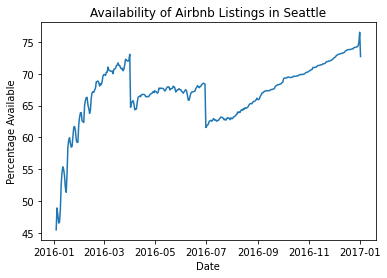

In [34]:


# Group calendar data by date and calculate availability percentage
availability = merged_df.groupby('date')['available'].mean() * 100

# Plot availability percentage over time
plt.plot(availability)
plt.title('Availability of Airbnb Listings in Seattle')
plt.xlabel('Date')
plt.ylabel('Percentage Available')
plt.show()


### 2) How does the price of a listing change throughout the year?

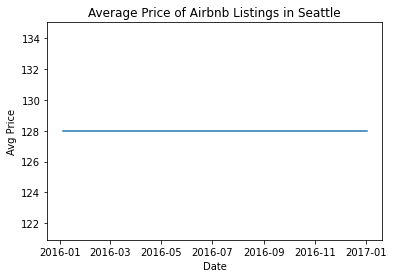

In [35]:
# Group calendar data by date and calculate avg price for each month
avg_price = merged_df.groupby('date')['price'].mean()

# Plot avg price over time
plt.plot(avg_price)
plt.title('Average Price of Airbnb Listings in Seattle')
plt.xlabel('Date')
plt.ylabel('Avg Price')
plt.show()

In [36]:
listings['host_since'] = pd.to_datetime(listings['host_since'])
listings['host_since'].dt.year.unique()

<ipython-input-36-9be0fbf3eddd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings['host_since'] = pd.to_datetime(listings['host_since'])


array([2011., 2013., 2014., 2010., 2012., 2015., 2016., 2009.,   nan,
       2008.])

In [37]:
listings['price']= listings['price'].str.replace('$', '').str.replace(',', '').astype(float)
listings['year']= listings['host_since'].dt.year
price_by_year = listings.groupby('year')['price'].mean()

print(price_by_year)

year
2008.0     79.500000
2009.0    125.750000
2010.0    144.167785
2011.0    140.510050
2012.0    124.920223
2013.0    129.563144
2014.0    127.360000
2015.0    122.049949
2016.0     53.200000
Name: price, dtype: float64


<ipython-input-37-95ac707ef609>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  listings['price']= listings['price'].str.replace('$', '').str.replace(',', '').astype(float)
<ipython-input-37-95ac707ef609>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings['price']= listings['price'].str.replace('$', '').str.replace(',', '').astype(float)
<ipython-input-37-95ac707ef609>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [38]:
listings['month']= listings['host_since'].dt.month
listings_price_by_month = listings.groupby(['year','month'])['price'].mean()
listings_price_by_month

<ipython-input-38-a7eba81fea69>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings['month']= listings['host_since'].dt.month


year    month
2008.0  11.0      79.500000
2009.0  1.0       89.000000
        2.0       85.000000
        3.0       59.000000
        4.0      173.333333
        5.0       85.000000
        6.0       52.500000
        8.0      140.000000
        9.0       74.125000
        10.0     250.000000
        11.0     158.285714
        12.0      94.666667
2010.0  1.0      174.789474
        2.0       88.333333
        3.0      122.166667
        4.0      157.583333
        5.0      109.333333
        6.0      110.000000
        7.0      181.555556
        8.0      104.863636
        9.0      104.333333
        10.0     155.000000
        11.0     151.642857
        12.0     131.600000
2011.0  1.0      214.750000
        2.0      111.333333
        3.0      171.867925
        4.0      155.230769
        5.0      164.187500
        6.0      197.244444
        7.0      124.525000
        8.0      130.840909
        9.0      130.044444
        10.0      87.846154
        11.0     140.703704
      

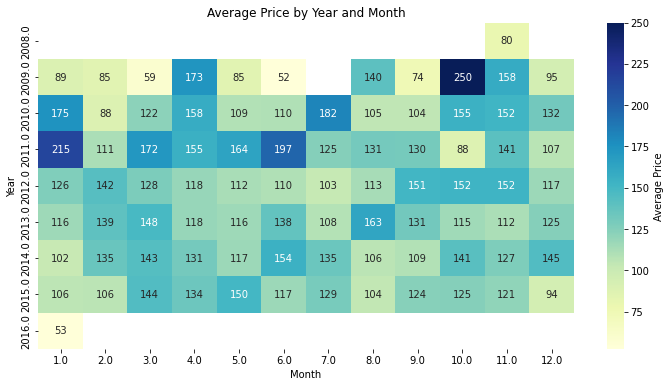

In [39]:
# Convert groupby object to DataFrame
listings_price_by_month_df = listings_price_by_month.reset_index()

# Pivot DataFrame to create a heatmap
heatmap_df = listings_price_by_month_df.pivot('year', 'month', 'price')

# Create heatmap using seaborn
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_df, cmap='YlGnBu', annot=True, fmt='.0f', cbar_kws={'label': 'Average Price'})
plt.title('Average Price by Year and Month')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()


<AxesSubplot:xlabel='month', ylabel='price'>

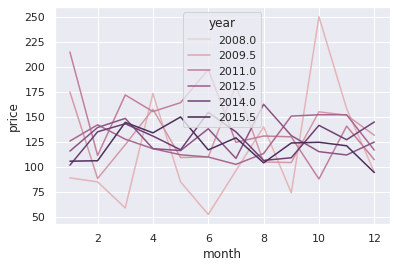

In [40]:
sns.set(style="darkgrid")

# convert the groupby object into a pandas dataframe
df = listings_price_by_month.reset_index()

# plot the data using seaborn lineplot
sns.lineplot(data=df, x="month", y="price", hue="year")


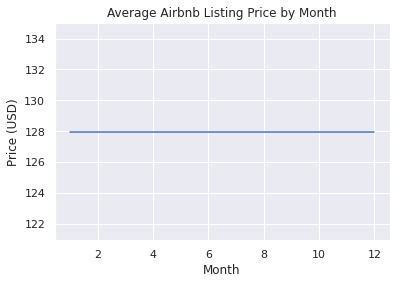

In [41]:
# extract month from date
calendar['month'] = calendar.index.month

# calculate average price by month
average_price_by_month = calendar.groupby('month')['price'].mean()

# plot the data
plt.plot(average_price_by_month.index, average_price_by_month.values)
plt.title('Average Airbnb Listing Price by Month')
plt.xlabel('Month')
plt.ylabel('Price (USD)')
plt.show()






In [42]:
merged_df.head()

,available,price,month
date,,,
2016-01-04,True,85.0,1
2016-01-05,True,85.0,1
2016-01-06,False,85.0,1
2016-01-07,False,85.0,1
2016-01-08,False,85.0,1


### What are the most important factors that influence the price of an Airbnb listing in Seattle?

In [43]:
listings[['bedrooms', 'price']].isna().sum()

bedrooms    6
price       0
dtype: int64

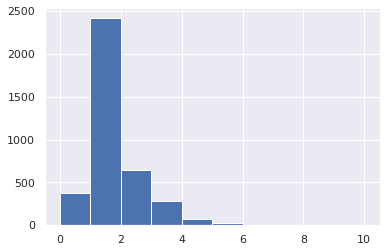

In [44]:
plt.hist(listings['bedrooms'], bins=range(11))
plt.show()

In [45]:
listings['bedrooms'].fillna(listings['bedrooms'].median(), inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


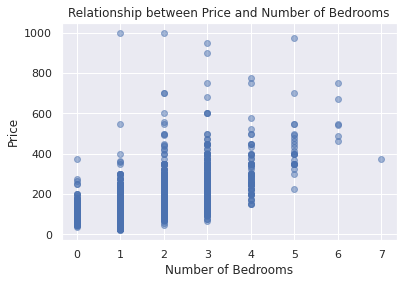

In [46]:
bedrooms = listings['bedrooms']
price = listings['price']
# create the scatter plot
plt.scatter(bedrooms, price, alpha=0.5)

# add labels and a title
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.title('Relationship between Price and Number of Bedrooms')
plt.show()

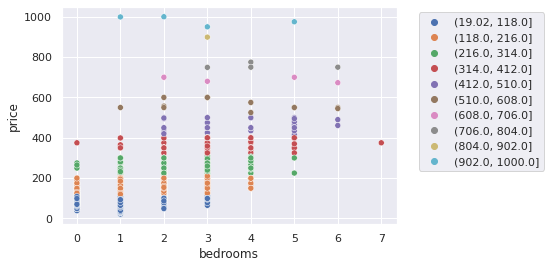

In [47]:
price_bins = pd.cut(listings.price, bins=10)
sns.scatterplot(x='bedrooms', y='price', hue=price_bins, data=listings)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

In [48]:
null_cols = listings.columns[listings.isnull().any()]
print(listings[null_cols].isnull().sum())


summary                         177
space                           569
neighborhood_overview          1032
transit                         934
host_name                         2
host_since                        2
host_location                     8
host_about                      859
host_response_time              523
host_response_rate              523
host_is_superhost                 2
host_neighbourhood              300
host_listings_count               2
host_total_listings_count         2
host_has_profile_pic              2
host_identity_verified            2
neighbourhood                   416
zipcode                           7
property_type                     1
bathrooms                        16
beds                              1
cleaning_fee                   1030
first_review                    627
last_review                     627
review_scores_rating            647
review_scores_accuracy          658
review_scores_cleanliness       653
review_scores_checkin       

In [49]:
numerical_cols = ['host_listings_count', 'latitude', 'longitude', 'reviews_per_month', 'year', 'month', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'minimum_nights', 'maximum_nights', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'guests_included']
listings[numerical_cols].head()

,host_listings_count,latitude,longitude,reviews_per_month,year,month,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,accommodates,bathrooms,bedrooms,beds,price,guests_included
0,3.0,47.636289,-122.371025,4.07,2011.0,8.0,95.0,10.0,10.0,10.0,10.0,9.0,10.0,1,365,14,41,71,346,207,4,1.0,1.0,1.0,85.0,2
1,6.0,47.639123,-122.365666,1.48,2013.0,2.0,96.0,10.0,10.0,10.0,10.0,10.0,10.0,2,90,13,13,16,291,43,4,1.0,1.0,1.0,150.0,1
2,2.0,47.629724,-122.369483,1.15,2014.0,6.0,97.0,10.0,10.0,10.0,10.0,10.0,10.0,4,30,1,6,17,220,20,11,4.5,5.0,7.0,975.0,10
3,1.0,47.638473,-122.369279,NaN,2013.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1125,0,0,0,143,0,3,1.0,0.0,2.0,100.0,1
4,2.0,47.632918,-122.372471,0.89,2011.0,11.0,92.0,9.0,9.0,10.0,10.0,9.0,9.0,1,1125,30,60,90,365,38,6,2.0,3.0,3.0,450.0,6


In [50]:
listings[numerical_cols].isna().sum()

host_listings_count              2
latitude                         0
longitude                        0
reviews_per_month              627
year                             2
month                            2
review_scores_rating           647
review_scores_accuracy         658
review_scores_cleanliness      653
review_scores_checkin          658
review_scores_communication    651
review_scores_location         655
review_scores_value            656
minimum_nights                   0
maximum_nights                   0
availability_30                  0
availability_60                  0
availability_90                  0
availability_365                 0
number_of_reviews                0
accommodates                     0
bathrooms                       16
bedrooms                         0
beds                             1
price                            0
guests_included                  0
dtype: int64

In [51]:
listings.dropna(subset=['beds','bathrooms','month','year','host_listings_count'], inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [52]:
listings[numerical_cols].isna().sum()

host_listings_count              0
latitude                         0
longitude                        0
reviews_per_month              621
year                             0
month                            0
review_scores_rating           641
review_scores_accuracy         652
review_scores_cleanliness      647
review_scores_checkin          652
review_scores_communication    645
review_scores_location         649
review_scores_value            650
minimum_nights                   0
maximum_nights                   0
availability_30                  0
availability_60                  0
availability_90                  0
availability_365                 0
number_of_reviews                0
accommodates                     0
bathrooms                        0
bedrooms                         0
beds                             0
price                            0
guests_included                  0
dtype: int64

In [53]:
# create an instance of SimpleImputer with mean strategy
imputer = SimpleImputer(strategy='mean')

# fit the imputer on the data
imputer.fit(listings[numerical_cols])

# transform the data by imputing missing values with mean
listings[numerical_cols] = imputer.transform(listings[numerical_cols])

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [54]:
listings[numerical_cols].corr()

,host_listings_count,latitude,longitude,reviews_per_month,year,month,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,accommodates,bathrooms,bedrooms,beds,price,guests_included
host_listings_count,1.000000,-0.012162,0.000284,-0.097571,-0.045418,-0.129706,-0.088446,-0.099313,-0.035551,-0.155863,-0.112813,0.020283,-0.091612,0.001900,0.022637,0.119812,0.124681,0.123931,0.086758,-0.062390,0.110699,0.068226,0.064906,0.085160,0.093909,-0.059070
latitude,-0.012162,1.000000,-0.154949,-0.076425,0.000211,-0.015330,-0.033173,-0.014590,-0.033602,-0.013480,-0.019060,0.090022,-0.017743,-0.001201,-0.004540,-0.022565,-0.040038,-0.039927,-0.001247,-0.030958,0.001150,-0.015072,0.039096,0.023054,-0.008726,0.034792
longitude,0.000284,-0.154949,1.000000,0.002338,0.013690,0.021669,-0.043863,-0.034602,-0.058263,-0.043999,-0.059419,-0.172681,-0.041272,0.003393,-0.010098,-0.007471,0.002851,0.008932,-0.008797,-0.010043,-0.071286,-0.017146,-0.054814,-0.067432,-0.101619,-0.023869
reviews_per_month,-0.097571,-0.076425,0.002338,1.000000,0.128474,-0.015358,0.085191,0.142946,0.133072,0.120635,0.100921,0.060191,0.123910,-0.034280,-0.032518,0.049443,0.096795,0.110604,0.002632,0.543698,-0.132819,-0.154548,-0.209576,-0.138466,-0.200379,-0.027589
year,-0.045418,0.000211,0.013690,0.128474,1.000000,-0.084533,0.026429,0.045643,0.047270,0.015107,0.028744,0.056454,0.065201,-0.014022,0.065109,-0.043883,-0.045095,-0.046166,-0.088972,-0.248363,-0.095857,-0.053500,-0.074511,-0.073732,-0.052753,-0.080872
month,-0.129706,-0.015330,0.021669,-0.015358,-0.084533,1.000000,-0.002334,-0.022907,-0.012183,0.009733,-0.009263,0.033026,0.015508,-0.021940,-0.009730,0.020529,0.011753,0.009175,0.018935,-0.030995,-0.077277,-0.028919,-0.045312,-0.050144,-0.026332,0.014669
review_scores_rating,-0.088446,-0.033173,-0.043863,0.085191,0.026429,-0.002334,1.000000,0.621047,0.639967,0.517682,0.538092,0.365638,0.694504,0.001278,-0.031006,-0.044578,-0.041555,-0.031975,-0.033607,0.034589,-0.012839,0.041391,0.020499,-0.001045,0.050018,-0.002440
review_scores_accuracy,-0.099313,-0.014590,-0.034602,0.142946,0.045643,-0.022907,0.621047,1.000000,0.545314,0.411019,0.423780,0.268532,0.563064,-0.014473,-0.003333,-0.052296,-0.043332,-0.027901,-0.036231,0.063378,-0.044634,-0.005622,-0.010600,-0.048060,0.018024,0.003071
review_scores_cleanliness,-0.035551,-0.033602,-0.058263,0.133072,0.047270,-0.012183,0.639967,0.545314,1.000000,0.393636,0.381062,0.275188,0.522981,-0.032423,-0.006085,0.009115,0.013520,0.019627,-0.019769,0.053851,0.009485,0.016575,-0.007510,0.004184,0.048985,0.015793
review_scores_checkin,-0.155863,-0.013480,-0.043999,0.120635,0.015107,0.009733,0.517682,0.411019,0.393636,1.000000,0.680767,0.237553,0.402059,-0.023311,-0.062293,-0.033863,-0.026522,-0.017693,-0.010312,0.086059,-0.019904,-0.002696,0.008863,-0.021456,0.006042,0.030846


In [55]:
listings['property_type'].isna().sum()

1

In [56]:
listings.dropna(subset=['property_type'], inplace=True)


/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [57]:
property_counts = listings['property_type'].value_counts()
print(property_counts)


House              1724
Apartment          1700
Townhouse           118
Condominium          91
Loft                 40
Bed & Breakfast      37
Other                22
Cabin                21
Camper/RV            13
Bungalow             13
Boat                  8
Tent                  5
Treehouse             3
Dorm                  2
Yurt                  1
Chalet                1
Name: property_type, dtype: int64


In [58]:
most_common_property = property_counts.index[0]
print(f"The most common property type listed on Airbnb in Seattle is: {most_common_property}")


The most common property type listed on Airbnb in Seattle is: House


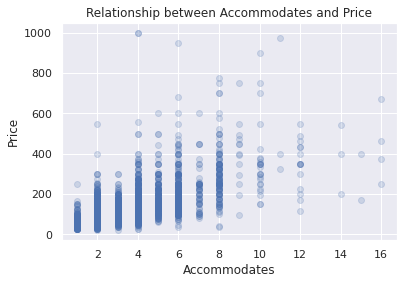

In [59]:
plt.scatter(listings['accommodates'], listings['price'], alpha=0.2)
plt.xlabel('Accommodates')
plt.ylabel('Price')
plt.title('Relationship between Accommodates and Price')
plt.show()


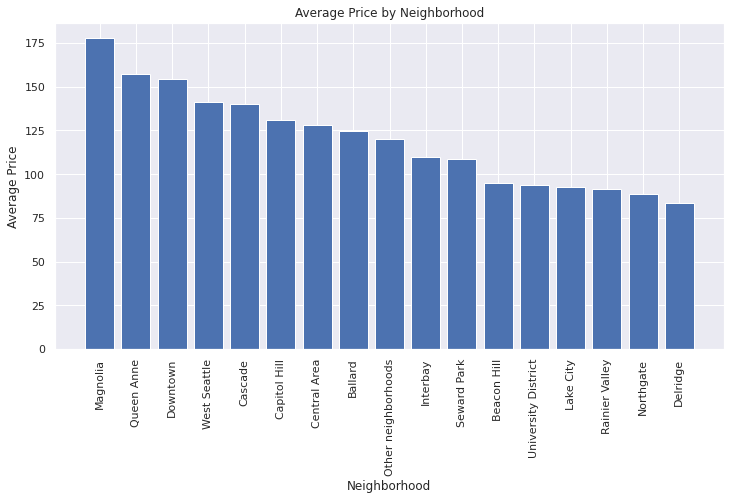

In [60]:
neighborhood_price = listings.groupby('neighbourhood_group_cleansed')['price'].mean().sort_values(ascending=False)
plt.figure(figsize=(12,6))
plt.bar(neighborhood_price.index, neighborhood_price.values)
plt.xticks(rotation=90)
plt.xlabel('Neighborhood')
plt.ylabel('Average Price')
plt.title('Average Price by Neighborhood')
plt.show()

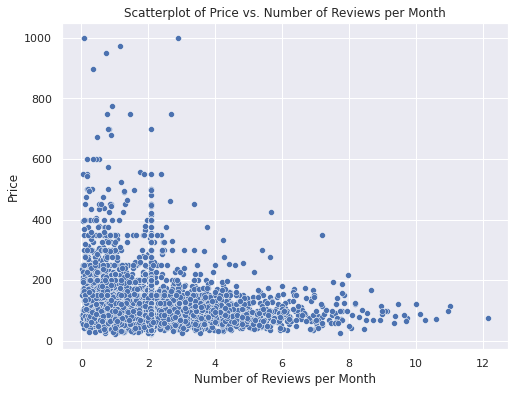

In [61]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='reviews_per_month', y='price', data=listings)
plt.title('Scatterplot of Price vs. Number of Reviews per Month')
plt.xlabel('Number of Reviews per Month')
plt.ylabel('Price')
plt.show()


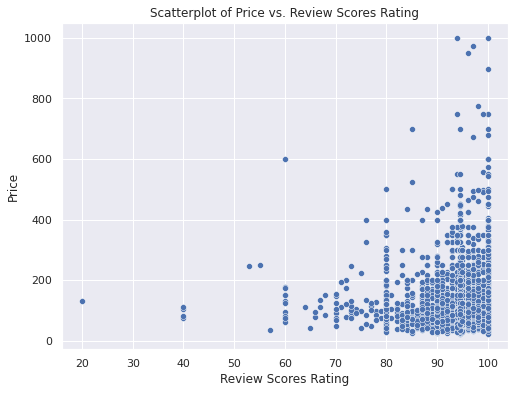

In [62]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='review_scores_rating', y='price', data=listings)
plt.title('Scatterplot of Price vs. Review Scores Rating')
plt.xlabel('Review Scores Rating')
plt.ylabel('Price')
plt.show()
